In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
import fiona
from shapely.geometry import linestring

## geographic data sources

2018 Tigerline file
https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2018.html

TIGER data overview:
https://www.census.gov/programs-surveys/geography/guidance/tiger-data-products-guide.html

2018 Tigerline shapefiles (national composite school district)
https://nces.ed.gov/programs/edge/data/TL_2018_SD.zip

Census 2019 cartographic:
https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html

In [4]:
## geopandas conversion shp to geojson

#     import geopandas
#     myshpfile = geopandas.read_file('myshpfile.shp')
#     myshpfile.to_file('myJson.geojson', driver='GeoJSON')

In [16]:
zipfile = "../data/geodata/SDU_2018/tl_2018_us_sdu.shp"
states = gpd.read_file(zipfile)

In [20]:
zipfile2 = "https://nces.ed.gov/programs/edge/data/TL_2018_SD.zip"
states2 = gpd.read_file(zipfile2)

In [21]:
states2.head()

,STATEFP,ELSDLEA,GEOID,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,GEO_YEAR,SCHOOLYEAR,geometry
0,01,00195,0100195,Pike Road City School District,00,KG,12,G5400,None,E,8.514688e+07,778561.0,+32.2831878,-085.9656803,2018,2017-2018,"MULTIPOLYGON (((-85.96190 32.28490, -85.95851 ..."
1,04,00004,0400004,Clarkdale-Jerome Elementary District,00,PK,08,G5400,None,E,2.113519e+08,380983.0,+34.7488572,-112.1120281,2018,2017-2018,"POLYGON ((-112.20163 34.70420, -112.20163 34.7..."
2,04,02370,0402370,Cottonwood-Oak Creek Elementary District,00,PK,08,G5400,None,E,1.108949e+09,20784.0,+34.8457669,-112.0405558,2018,2017-2018,"POLYGON ((-112.33454 34.97302, -112.33226 34.9..."
3,04,02400,0402400,Crane Elementary District,00,PK,08,G5400,None,E,1.171848e+08,1140819.0,+32.6726998,-114.6893594,2018,2017-2018,"POLYGON ((-114.78005 32.63273, -114.77921 32.6..."
4,04,03240,0403240,Gadsden Elementary District,00,PK,08,G5400,None,E,7.828461e+07,357117.0,+32.5324826,-114.7739783,2018,2017-2018,"POLYGON ((-114.81659 32.50770, -114.81629 32.5..."


In [22]:
states2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATEFP     1958 non-null   object  
 1   ELSDLEA     1958 non-null   object  
 2   GEOID       1958 non-null   object  
 3   NAME        1958 non-null   object  
 4   LSAD        1958 non-null   object  
 5   LOGRADE     1958 non-null   object  
 6   HIGRADE     1958 non-null   object  
 7   MTFCC       1958 non-null   object  
 8   SDTYP       51 non-null     object  
 9   FUNCSTAT    1958 non-null   object  
 10  ALAND       1958 non-null   float64 
 11  AWATER      1958 non-null   float64 
 12  INTPTLAT    1958 non-null   object  
 13  INTPTLON    1958 non-null   object  
 14  GEO_YEAR    1958 non-null   object  
 15  SCHOOLYEAR  1958 non-null   object  
 16  geometry    1958 non-null   geometry
dtypes: float64(2), geometry(1), object(14)
memory usage: 260.2+ KB


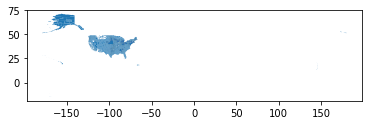

In [7]:
states.plot()

In [8]:
states.GEOID.describe()

count       10887
unique      10887
top       4814190
freq            1
Name: GEOID, dtype: object

In [9]:
states['LEAID'] = states['GEOID']

In [10]:
divide = pd.read_pickle('../data/divide_9928.pkl')
divide.head()

,reading_score,math_score,comp_pct,broadband_pct,poverty_ratio,white_pct,college_pct,median_income,median_rent,unemployment_pct,home_lang_not_eng,disability_pct,composite_score
LEAID,,,,,,,,,,,,,
0102650,48,48,81.2,72.9,16.5,89.2,83.4,48.0,48.0,7.8,3.0,18.4,48.0
0102670,17,15,55.9,46.2,49.0,29.9,78.1,17.0,17.0,12.3,1.4,25.2,16.0
0102700,41,43,83.5,68.1,32.3,49.4,84.2,41.0,41.0,9.2,4.9,16.6,42.0
0102730,37,29,72.9,62.8,29.4,56.0,80.6,37.0,37.0,10.6,4.3,24.5,33.0
0102760,48,53,81.5,70.5,27.9,88.8,82.8,48.0,48.0,7.3,1.4,23.7,50.5


In [11]:
.merge(country_names, on='iso_a3')

SyntaxError: invalid syntax (<ipython-input-11-89b6b4d25f43>, line 1)

In [12]:
states = states.merge(divide, on='LEAID')

In [13]:
states.head()

,STATEFP,UNSDLEA,GEOID,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,...,broadband_pct,poverty_ratio,white_pct,college_pct,median_income,median_rent,unemployment_pct,home_lang_not_eng,disability_pct,composite_score
0,02,00001,0200001,Lower Kuskokwim School District,00,PK,12,G5420,None,E,...,76.0,37.5,11.7,81.4,8.0,8.0,17.5,65.9,10.4,8.5
1,02,00003,0200003,Lower Yukon School District,00,PK,12,G5420,None,E,...,60.7,45.1,2.5,75.6,2.0,2.0,31.7,39.3,10.9,2.5
2,02,00840,0200840,Yakutat School District,00,PK,12,G5420,None,E,...,69.8,15.2,44.8,91.8,44.0,44.0,6.1,14.5,8.7,39.0
3,02,00007,0200007,Aleutians East Borough School District,00,PK,12,G5420,None,E,...,67.3,11.9,17.7,86.4,37.0,37.0,3.5,38.8,8.5,34.5
4,02,00020,0200020,Bering Strait School District,00,PK,12,G5420,None,E,...,63.5,29.6,7.8,79.6,7.0,7.0,22.8,39.4,11.7,8.0


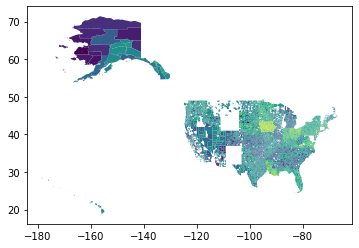

In [14]:
states.plot(column='composite_score');


In [15]:
print(type(states))

<class 'geopandas.geodataframe.GeoDataFrame'>
